# Regression model of 1000 companies

The dependent features are:

1) R&D Spend (X1)

2) Administration (X2)

3) Marketing Spend (X3)

The independent feature is:

1) Profit (Y)

Objective:

To predict the profit of the company.


In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#reading the csv file
df=pd.read_csv("1000_Companies.csv")

In [3]:
#finding the data types of all the features
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [4]:
#printing the first 5 rows of the dataframe
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
#finding the no. of rows and columns
df.shape

(1000, 5)

In [6]:
#finding the total no. of elements
df.size

5000

In [7]:
#finding the no. of dimensions
df.ndim

2

In [8]:
#finding the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
R&D Spend          1000 non-null float64
Administration     1000 non-null float64
Marketing Spend    1000 non-null float64
State              1000 non-null object
Profit             1000 non-null float64
dtypes: float64(4), object(1)
memory usage: 39.1+ KB


In [9]:
#finding the value of other terms
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [10]:
#finding the names of columns
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [11]:
#finding the no. of NaN values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
#finding the count of the value of a column
df.State.value_counts()

California    344
New York      334
Florida       322
Name: State, dtype: int64

Observation(s):

1) The count of all the three states is almost similar and so the data is balanced.

# Heatmap

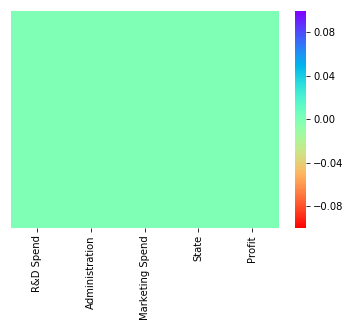

In [13]:
#to check for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap="rainbow_r")

Observation(s):

1) There are no null values therefore there are no bars in the graph.

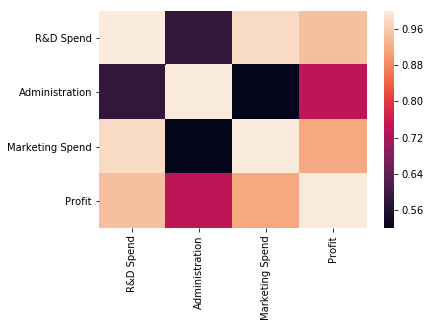

In [14]:
#finding the correlation among the features
sns.heatmap(df.corr())

Observation(s):

1) We can say that the relation of R&D Spend and Profit is high and therefore they are highly related.

2) We can say that the relation of Administration and profit is average and therefore administration doesn not count much in predicticting the profit.

3) We can say that the relation of marketing spend and profit is high and therefor they are highly relatable. 

# Separating features

In [15]:
#separating the features (x1,x2,x3) and the output feature(y)
x=df.drop("Profit",axis=1)
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [16]:
y=df["Profit"]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

# Categorical values to numbers

In [17]:
#We can use method 2 as we have only 3 states
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LevelEncod=LabelEncoder()
x["State"]=LevelEncod.fit_transform(x["State"])
#below code is for method 1
#OneHotEnc= OneHotEncoder(categorical_features=[3])
#X=oneHotEnc.fit_transform(x).toarray()

In [18]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


# Split into training data and test data

1) For most cases, generally we take 70%-training 30%-test

2) If data is less, then 80%-training 20-25%-test

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [20]:
x_train.shape

(700, 4)

In [21]:
x_test.shape

(300, 4)

# Training the model

In [22]:
#import linear regression
from sklearn.linear_model import LinearRegression
#call the linear regression function
model=LinearRegression()

In [23]:
#train the model
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
#predict the test data
pred=model.predict(x_test)

In [25]:
#gives the value of y
pred

array([ 95339.48445356,  77075.93480097,  77175.57075287,  88732.0934632 ,
       163539.82321892,  50046.25489391, 116432.36383007,  96910.82906419,
        95022.3214811 , 129532.41335696, 154321.88880068, 175376.69597524,
       182633.78176592, 147295.83224402, 172150.81107946,  79498.58395746,
       151171.41204574,  87392.77216297, 106521.34174001, 172156.99693889,
       154943.89471358, 147533.78371622, 112721.79424398,  54050.15361535,
        72389.58975086, 119649.77470692, 183491.40106779,  69774.71985559,
       143374.52181452, 162252.16082397,  94252.56639296, 107773.39891283,
       183420.44832117, 127936.23344304, 155273.82350059,  96425.15028742,
       161452.64395421,  99318.76853429, 172282.33326825,  95247.76495208,
        92501.98025463, 156887.30887168,  56265.00716586,  74056.24395161,
       166710.20143321,  63989.34295505,  97241.1074144 , 103885.57641462,
       143952.52736368,  58959.48254138, 133562.04173725,  58810.78357875,
       146472.9529744 , 1

In [26]:
len(pred)

300

In [27]:
#new query point
x1=[[163564.34,34986.11,221564.56,2],[12345.56,451278.44,98109.56,0]]
x1

[[163564.34, 34986.11, 221564.56, 2], [12345.56, 451278.44, 98109.56, 0]]

In [28]:
#prediction for the new query
y1=model.predict(x1)
y1

array([ 58573.57230509, 451507.82035648])

In [29]:
#printing the coefficients of"y=b0+b1x1+b2x2+b3x3"
print(model.coef_)

[5.00029419e-01 1.15699875e+00 1.00739757e-01 3.32395651e+02]


In [30]:
#printing the intercept
print(model.intercept_)

-86677.44627950148


# Checking accuracy of the model

In [31]:
from sklearn.metrics import r2_score,adjusted_rand_score

In [32]:
r_squared=r2_score(pred,y_test)
r_squared

0.967332761666108